# Value at Risk Assessment Model

### Import Packages


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [2]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_MSFT)

yfinance.Ticker object <MSFT>
---------
417.1400146484375


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [3]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4 week treasury bill rate)
rfr_MSFT = 0.02 

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2116

### Simulations - Calculate Investment Returns

In [4]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_MSFT = 21/252 

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   3.,   5.,   6.,   2.,   8.,   7.,   8.,  17.,   4.,  17.,
          9.,  18.,  14.,  22.,  20.,  32.,  31.,  43.,  44.,  39.,  65.,
         68.,  62.,  61.,  69.,  74.,  95.,  92.,  90., 118., 102., 119.,
        108., 118., 131., 149., 121., 143., 137., 130., 136., 136., 141.,
        128., 137., 135., 115., 117., 115., 117., 114., 106., 104.,  97.,
         80.,  82.,  80.,  73.,  65.,  71.,  64.,  49.,  45.,  37.,  42.,
         26.,  22.,  25.,  19.,  15.,  16.,  10.,  15.,  10.,  12.,   6.,
          7.,   5.,   3.,   6.,   3.,   0.,   1.,   6.,   1.,   0.,   1.,
          1.]),
 array([-3.76915968, -3.69767215, -3.62618461, -3.55469708, -3.48320955,
        -3.41172201, -3.34023448, -3.26874694, -3.19725941, -3.12577188,
        -3.05428434, -2.98279681, -2.91130928, -2.83982174, -2.76833421,
        -2.69684668, -2.62535914, -2.55387161, -2.48238407, -2.41089654,
        -2.33940901, -2.26

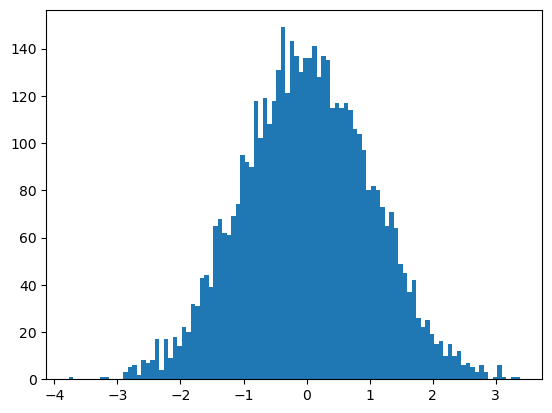

In [5]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [6]:
print(np.mean(sample))
print(np.std(sample))

0.004218421764637424
1.0188291349496859


In [7]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [8]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-30,083
VaR at 95% confidence level: $-38,573
VaR at 99% confidence level: $-54,533


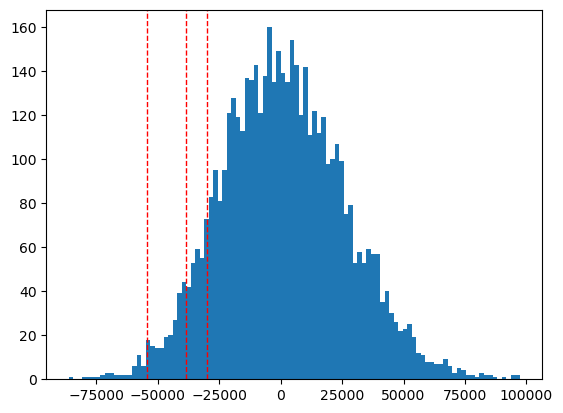

In [9]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)